In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

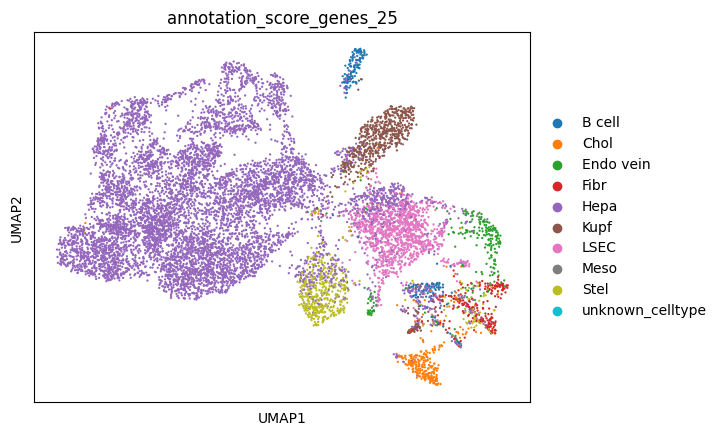

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             1.950481
Chol                               2.511578
Endo vein                          2.066263
Fibr                               2.030638
Hepa                              70.137157
Kupf                               5.860349
LSEC                              10.758817
Meso                               0.115782
Stel                               4.551122
unknown_celltype                   0.017813


In [4]:
# Do score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [5]:
scoresper_cluster

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
cells,,,,,,,,,
64,0.323143,-0.020554,-0.005158,-0.018347,-0.003197,-0.038632,-0.030666,0.000000,0.000000
66,0.046678,-0.027087,-0.008058,-0.025873,0.029699,-0.041057,0.012679,-0.030594,0.052649
67,0.070567,-0.020175,0.000000,-0.012524,-0.010856,-0.020401,0.021378,-0.002682,0.061328
68,0.213175,-0.007297,0.000000,-0.020366,-0.007175,-0.022065,-0.004059,0.000000,0.018438
69,0.204004,-0.004611,0.000000,0.019998,-0.001853,0.000104,-0.008695,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
28929,0.222158,-0.019437,0.000000,0.007163,-0.001339,-0.009384,-0.011246,0.000000,0.000000
28944,0.386497,-0.026825,0.000000,-0.030517,0.007409,-0.038108,-0.037412,-0.004184,0.000000
28992,0.240235,-0.017323,-0.001431,-0.021996,0.001830,-0.042440,-0.028069,-0.002266,-0.001943


In [6]:
# max of each column scoresper_cluster
scoresper_cluster.max(axis=0)

Hepa         0.435114
LSEC         0.203064
Endo vein    0.230110
Chol         0.374593
Kupf         0.229587
Stel         0.185498
Fibr         0.132565
B cell       0.349833
Meso         0.169853
dtype: float64

0.25


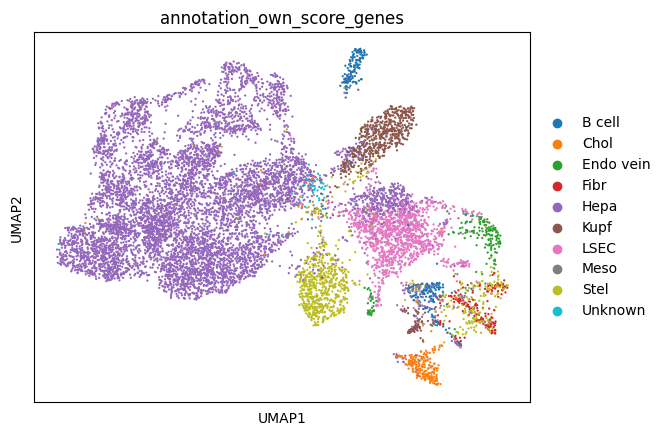

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.085765,0.021767,NaN,0.020318,NaN,NaN
1,NaN,0.055902,NaN,NaN,0.376261,NaN,0.241621,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.019384,NaN,0.274330,NaN,0.717227
3,0.199726,NaN,NaN,0.036456,NaN,NaN,0.154209,NaN,0.229382
4,0.234711,NaN,NaN,0.069145,NaN,0.056901,0.022204,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.059235,NaN,0.061714,0.020161,NaN,NaN
11224,0.511616,NaN,NaN,0.081015,0.051679,0.072720,0.028773,NaN,NaN
11225,0.354052,NaN,NaN,0.058203,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.242782,NaN,NaN


In [7]:

scores = own_score_genes(sdata,path_mg,scale_score='MinMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


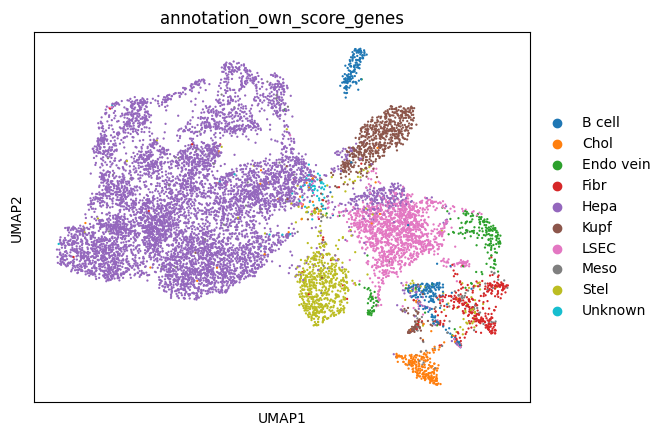

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.858924
Chol                         2.333452
Endo vein                    1.941575
Fibr                         3.001425
Hepa                        63.617741
Kupf                         6.056288
LSEC                        12.433203
Meso                         1.157820
Stel                         6.083007
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.742125,NaN,0.047707,0.188044,0.040411,NaN,0.051352,NaN,NaN
1,NaN,0.102589,NaN,NaN,0.698543,NaN,0.610657,NaN,1.841340
2,NaN,NaN,NaN,NaN,0.035988,NaN,0.693324,NaN,2.510725
3,0.275121,NaN,NaN,0.079932,NaN,NaN,0.389737,NaN,0.802976
4,0.323314,NaN,NaN,0.151606,NaN,0.087185,0.056116,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.431841,NaN,NaN,0.129876,NaN,0.094561,0.050954,NaN,NaN
11224,0.704748,NaN,NaN,0.177629,0.095943,0.111424,0.072719,NaN,NaN
11225,0.487704,NaN,NaN,0.127613,0.092615,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.117031,0.923753,0.613592,NaN,NaN


In [8]:

scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

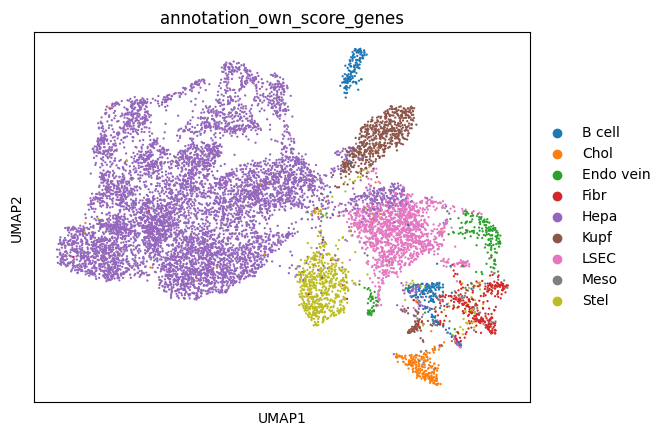

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.850018
Chol                         2.199857
Endo vein                    1.914856
Fibr                         2.930175
Hepa                        64.873530
Kupf                         5.949412
LSEC                        12.272889
Meso                         1.157820
Stel                         5.851443


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.742125,0.000000,0.047707,0.188044,0.040411,0.051116,0.051352,0.0,0.000000
1,0.182858,0.102589,0.000000,0.000000,0.698543,0.015754,0.610657,0.0,1.841340
2,0.179009,0.000000,0.000000,0.034654,0.035988,0.036753,0.693324,0.0,2.510725
3,0.275121,0.000000,0.000000,0.079932,0.000000,0.040711,0.389737,0.0,0.802976
4,0.323314,0.000000,0.000000,0.151606,0.000000,0.087185,0.056116,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.431841,0.000000,0.000000,0.129876,0.000000,0.094561,0.050954,0.0,0.000000
11224,0.704748,0.000000,0.000000,0.177629,0.095943,0.111424,0.072719,0.0,0.000000
11225,0.487704,0.000000,0.000000,0.127613,0.092615,0.027314,0.027440,0.0,0.000000
11226,0.047458,0.000000,0.000000,0.023403,0.117031,0.923753,0.613592,0.0,0.000000


In [9]:

scores = own_score_genes(sdata,path_mg,min_score='None')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


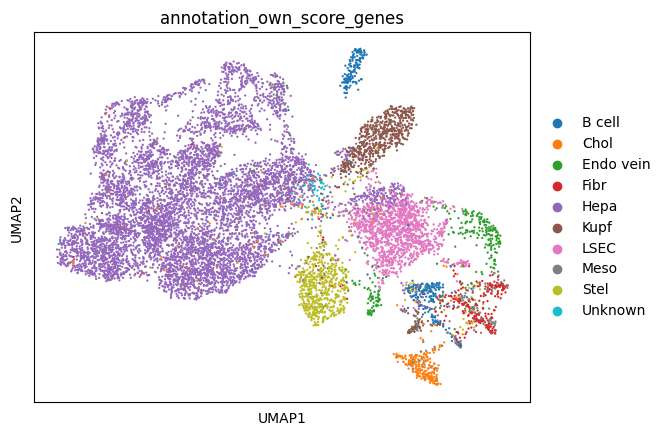

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.188457
Chol                         2.885643
Endo vein                    2.502672
Fibr                         2.440328
Hepa                        61.943356
Kupf                         6.074100
LSEC                        12.076950
Meso                         2.529391
Stel                         5.842537
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.792675,NaN,0.075063,0.287679,0.048253,NaN,0.062388,NaN,NaN
1,NaN,0.116998,NaN,NaN,0.834091,NaN,0.741897,NaN,3.669726
2,NaN,NaN,NaN,NaN,0.042971,NaN,0.842330,NaN,5.003789
3,0.288355,NaN,NaN,0.122283,NaN,NaN,0.473498,NaN,1.600303
4,0.340398,NaN,NaN,0.231933,NaN,0.092828,0.068176,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.457597,NaN,NaN,0.198690,NaN,0.101395,0.061905,NaN,NaN
11224,0.752311,NaN,NaN,0.271746,0.114560,0.120980,0.088347,NaN,NaN
11225,0.517924,NaN,NaN,0.195229,0.110587,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.139741,1.064415,0.745462,NaN,NaN


In [10]:

scores = own_score_genes(sdata,path_mg,scale_score_q=2)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


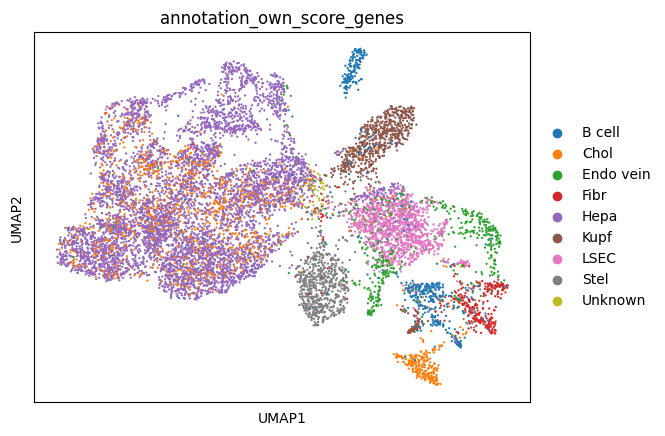

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.880656
Chol                        13.412896
Endo vein                    4.729248
Fibr                         2.841112
Hepa                        50.641254
Kupf                         6.519416
LSEC                        10.509441
Stel                         5.949412
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.864947,NaN,0.162227,0.497970,0.083424,NaN,0.078924,NaN,NaN
1,NaN,0.153802,NaN,NaN,1.442064,NaN,1.095727,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.074293,NaN,1.246012,NaN,0.717227
3,0.290503,NaN,NaN,0.211671,NaN,NaN,0.694100,NaN,0.229382
4,0.349783,NaN,NaN,0.401475,NaN,0.120230,0.087586,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.483278,NaN,NaN,0.343932,NaN,0.133739,0.078202,NaN,NaN
11224,0.818970,NaN,NaN,0.470390,0.198064,0.164627,0.117769,NaN,NaN
11225,0.551993,NaN,NaN,0.337939,0.191194,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.241598,1.652483,1.101062,NaN,NaN


In [11]:
scores = own_score_genes(sdata,path_mg,scale_score_q=5)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


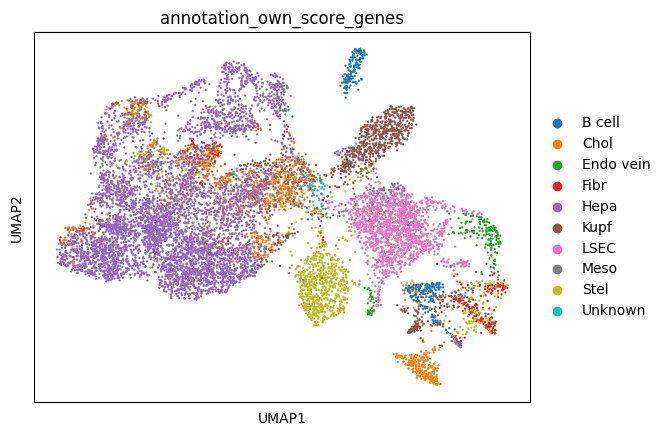

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.215176
Chol                         9.342715
Endo vein                    2.671892
Fibr                         3.696117
Hepa                        48.147488
Kupf                         8.363021
LSEC                        14.392590
Meso                         1.193445
Stel                         8.460990
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.321667,NaN,-0.007951,0.009958,-0.023930,NaN,-0.031415,NaN,NaN
1,NaN,-0.010820,NaN,NaN,0.347125,NaN,0.201574,NaN,0.521940
2,NaN,NaN,NaN,NaN,-0.026424,NaN,0.236010,NaN,0.714801
3,-0.176916,NaN,NaN,-0.043439,NaN,NaN,0.109546,NaN,0.222771
4,-0.125464,NaN,NaN,-0.008039,NaN,-0.050863,-0.029430,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.009599,NaN,NaN,-0.018771,NaN,-0.045499,-0.031580,NaN,NaN
11224,0.281763,NaN,NaN,0.004815,0.007379,-0.033235,-0.022514,NaN,NaN
11225,0.050042,NaN,NaN,-0.019889,0.005503,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.019269,0.557504,0.202796,NaN,NaN


In [12]:

scores = own_score_genes(sdata,path_mg,scale_score='ZeroMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


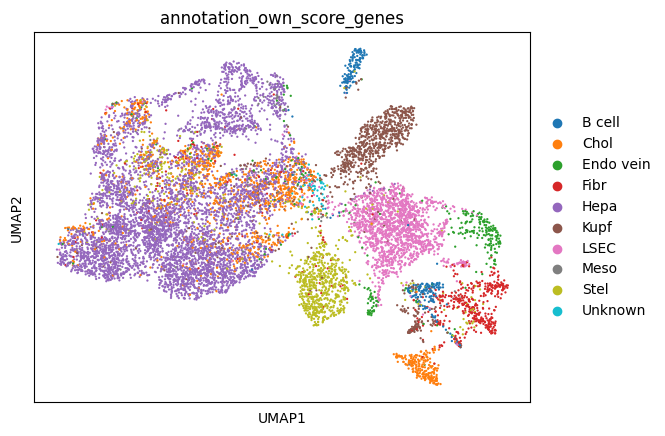

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.698611
Chol                        11.435696
Endo vein                    2.965800
Fibr                         4.862843
Hepa                        46.170289
Kupf                         8.478803
LSEC                        14.089776
Meso                         0.855005
Stel                         7.926612
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.724390,NaN,-0.428053,0.390216,-1.935285,NaN,-2.852406,NaN,NaN
1,NaN,-0.451450,NaN,NaN,28.073285,NaN,18.302675,NaN,15.658499
2,NaN,NaN,NaN,NaN,-2.136977,NaN,21.429431,NaN,21.444426
3,-3.148392,NaN,NaN,-1.702138,NaN,NaN,9.946627,NaN,6.683257
4,-2.232764,NaN,NaN,-0.314997,NaN,-2.657646,-2.672196,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.170817,NaN,NaN,-0.735539,NaN,-2.377381,-2.867433,NaN,NaN
11224,5.014245,NaN,NaN,0.188656,0.596784,-1.736590,-2.044225,NaN,NaN
11225,0.890555,NaN,NaN,-0.779333,0.445038,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,1.558340,29.130346,18.413673,NaN,NaN


In [13]:

scores = own_score_genes(sdata,path_mg,scale_score='None')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


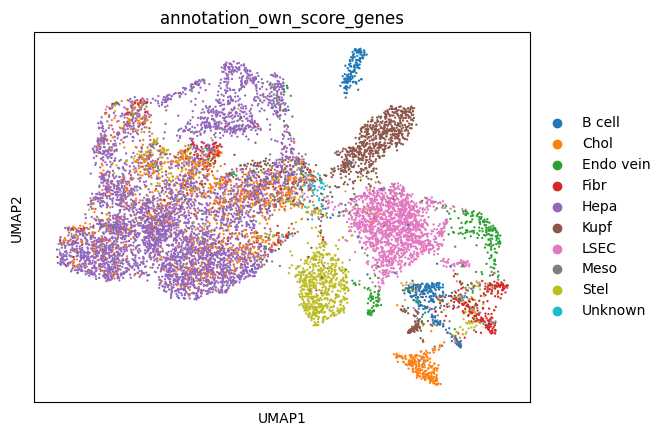

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.651585
Chol                        12.442109
Endo vein                    3.322052
Fibr                         3.705023
Hepa                        43.961525
Kupf                         8.425365
LSEC                        14.071963
Meso                         1.923762
Stel                         7.980050
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.572439,NaN,-0.047561,0.055745,-0.120955,NaN,-0.135829,NaN,NaN
1,NaN,-0.041041,NaN,NaN,1.754580,NaN,0.871556,NaN,3.131700
2,NaN,NaN,NaN,NaN,-0.133561,NaN,1.020449,NaN,4.288885
3,-0.314839,NaN,NaN,-0.243163,NaN,NaN,0.473649,NaN,1.336651
4,-0.223276,NaN,NaN,-0.045000,NaN,-0.166103,-0.127247,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.017082,NaN,NaN,-0.105077,NaN,-0.148586,-0.136544,NaN,NaN
11224,0.501425,NaN,NaN,0.026951,0.037299,-0.108537,-0.097344,NaN,NaN
11225,0.089055,NaN,NaN,-0.111333,0.027815,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.097396,1.820647,0.876842,NaN,NaN


In [14]:

scores = own_score_genes(sdata,path_mg,scale_score='Nmarkers')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


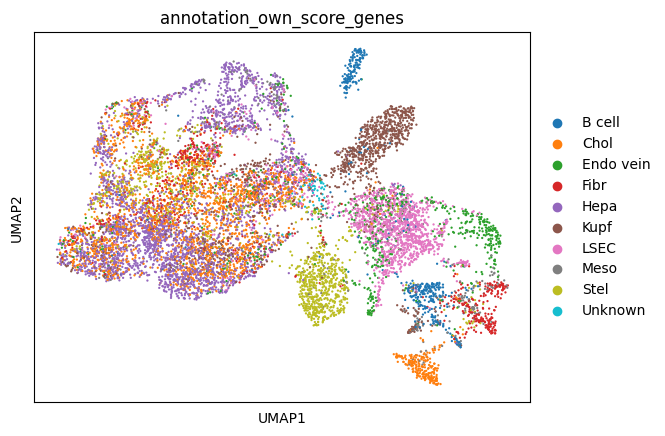

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.390809
Chol                        18.694336
Endo vein                    6.341290
Fibr                         6.020663
Hepa                        24.884218
Kupf                        11.863199
LSEC                        13.564304
Meso                         2.858924
Stel                        10.865693
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.874243,NaN,0.725196,0.649092,0.635910,NaN,0.357410,NaN,NaN
1,NaN,0.751648,NaN,NaN,0.969006,NaN,0.958586,NaN,0.998308
2,NaN,NaN,NaN,NaN,0.601443,NaN,0.969451,NaN,0.999198
3,0.288119,NaN,NaN,0.303349,NaN,NaN,0.921179,NaN,0.987887
4,0.340043,NaN,NaN,0.536427,NaN,0.378874,0.402031,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.481831,NaN,NaN,0.467314,NaN,0.427859,0.353758,NaN,NaN
11224,0.839330,NaN,NaN,0.615960,0.845654,0.531172,0.544353,NaN,NaN
11225,0.561275,NaN,NaN,0.460189,0.840399,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.868988,0.984147,0.959209,NaN,NaN


In [15]:

scores = own_score_genes(sdata,path_mg,scale_score='Rank')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores